# Bulding ML pipeline for Reactor data

**Course: Applied AI in Chemical and Process Engineering**


**Week 3/4**

This notebook witll build a pipeline to prepare data and develop an ML algorithm

Content:

Part 1

*   Data loading
*   Data exploration
*   Quality Checks
*   Visualization

Part 2
*   Normalization
*   Model training, validation and testing
*   Predictions
*   Optimization

**About data**
Synethic data generated from Aspen HYSYS

*   Sensor1 : Liquid Percentage in Condenser
*   Sensor2: Condenser Pressure
*   Sensor3: Liquid Percentage in Reboiler
*   Sensor4 & Sensor5: Mass Flow Rate in Feed Flow and Top Outlet Stream
*   Sensor6: Net Mass Flow in main tower
*   Sensor7: Mole Fraction HX at reboiler
*   Sensor8: HX Mole Fraction in Top Outler Stream
*   Sensor9 & Sensor10: Feed Mole Fraction
*   Sensor11: Feed Tray Temperature
*   Sensor12: Main Tower Pressure
*   Sensor13: Bottom Tower Pressure
*   Sensor14: Top Tower Pressure
*   Sensor15: Reflux Ratio
*   Sensor16: Duties Summary
*   MoleFraction TX
*   MoleFraction HX

*Credits: Amar Haiqal Che Hussin*

In [46]:
# Load all the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.optimize import minimize
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
import math
from sklearn.preprocessing import MinMaxScaler

# Data Preperation


In [47]:
df = pd.read_csv('https://raw.githubusercontent.com/dissabnd/Applied-AI-in-Chemical-and-Process-Engineering/refs/heads/main/data/Distillation%20Column%20Dataset_noisy.csv')

In [48]:
# prompt: list all columns

df.columns

Index(['Time', 'Sensor1', 'Sensor2', 'Sensor3', 'Sensor4', 'Sensor5',
       'Sensor6', 'Sensor7', 'Sensor8', 'Sensor9', 'Sensor10', 'Sensor11',
       'Sensor12', 'Sensor13', 'Sensor14', 'Sensor15', 'Sensor16',
       'MoleFractionTX', 'MoleFractionHX'],
      dtype='object')

In [49]:
# Print data table
df.head(10)

,Time,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16,MoleFractionTX,MoleFractionHX
0,0,49.718959,101.414959,49.718959,3693.858959,6695.368959,2924.818959,1048.588959,0.054394,0.501001,0.498999,76.803959,104.148959,110.216959,67.038059,0.798463,0,0.966281,0.033719
1,30,49.561845,100.962045,49.541545,3712.947045,6629.637045,2767.487045,1046.987045,0.054233,0.501001,0.498999,76.437645,103.977045,110.045045,66.866145,0.800811,0,0.965788,0.034212
2,60,50.189365,101.490865,50.145165,3718.008865,6692.598865,2763.018865,1050.988865,0.053941,0.501001,0.498999,77.041465,104.608865,110.676865,67.497965,0.803544,0,0.965758,0.034242
3,90,50.183496,101.403296,50.142796,3721.819296,6702.869296,2754.009296,1051.449296,0.053968,0.501001,0.498999,77.016096,104.609296,110.677296,67.498396,0.807065,0,0.965756,0.034244
4,120,50.428793,101.603693,50.406093,3724.444693,6710.444693,2744.244693,1052.674693,0.054121,0.501001,0.498999,77.252293,104.864693,110.932693,67.753793,0.811774,0,0.965784,0.034216
5,150,49.866302,101.041502,49.871402,3724.463502,6716.273502,2733.993502,1053.263502,0.054402,0.501001,0.498999,76.691202,104.313502,110.381502,67.202602,0.817048,0,0.965834,0.034166
6,180,49.993916,101.203416,50.028916,3723.559416,6720.699416,2730.279416,1054.249416,0.054752,0.501001,0.498999,76.828516,104.449416,110.517416,67.338516,0.821701,0,0.965895,0.034105
7,210,50.303765,101.567965,50.362865,3721.670965,6722.360965,2730.720965,1055.240965,0.055087,0.501001,0.498999,77.149165,104.760965,110.828965,67.650065,0.824287,0,0.965953,0.034047
8,240,49.512472,100.835572,49.585372,3718.154572,6720.184572,2734.354572,1054.544572,0.055342,0.501001,0.498999,76.367072,103.964572,110.032572,66.853672,0.824215,0,0.965997,0.034003
9,270,49.542362,100.913462,49.616662,3715.693462,6716.733462,2741.883462,1054.363462,0.055466,0.501001,0.498999,76.400862,103.983462,110.051462,66.872562,0.821375,0,0.966019,0.033981


In [50]:
# Size of the data table

df.shape

(961, 19)

# Data Cleaning

In [51]:
df=df.drop('Time', axis=1)

## Check for missing data

In [52]:
print(df.isna().sum())

Sensor1           20
Sensor2           20
Sensor3           20
Sensor4            0
Sensor5            0
Sensor6            0
Sensor7            0
Sensor8            0
Sensor9            0
Sensor10           0
Sensor11           0
Sensor12           0
Sensor13           0
Sensor14           0
Sensor15           0
Sensor16           0
MoleFractionTX     0
MoleFractionHX     0
dtype: int64


## Fill the missing data wiht median using imputer

In [53]:
imputer = SimpleImputer(strategy='median')

df2 = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
print(df2.isna().sum())

print (df2.shape)

Sensor1           0
Sensor2           0
Sensor3           0
Sensor4           0
Sensor5           0
Sensor6           0
Sensor7           0
Sensor8           0
Sensor9           0
Sensor10          0
Sensor11          0
Sensor12          0
Sensor13          0
Sensor14          0
Sensor15          0
Sensor16          0
MoleFractionTX    0
MoleFractionHX    0
dtype: int64
(961, 18)


In [54]:
df2

,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16,MoleFractionTX,MoleFractionHX
0,49.718959,101.414959,49.718959,3693.858959,6695.368959,2924.818959,1048.588959,0.054394,0.501001,0.498999,76.803959,104.148959,110.216959,67.038059,0.798463,0.0,0.966281,0.033719
1,49.561845,100.962045,49.541545,3712.947045,6629.637045,2767.487045,1046.987045,0.054233,0.501001,0.498999,76.437645,103.977045,110.045045,66.866145,0.800811,0.0,0.965788,0.034212
2,50.189365,101.490865,50.145165,3718.008865,6692.598865,2763.018865,1050.988865,0.053941,0.501001,0.498999,77.041465,104.608865,110.676865,67.497965,0.803544,0.0,0.965758,0.034242
3,50.183496,101.403296,50.142796,3721.819296,6702.869296,2754.009296,1051.449296,0.053968,0.501001,0.498999,77.016096,104.609296,110.677296,67.498396,0.807065,0.0,0.965756,0.034244
4,50.428793,101.603693,50.406093,3724.444693,6710.444693,2744.244693,1052.674693,0.054121,0.501001,0.498999,77.252293,104.864693,110.932693,67.753793,0.811774,0.0,0.965784,0.034216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,49.604279,100.903579,54.520579,3783.434579,6808.374579,2782.764579,1052.594579,0.054906,0.501001,0.498999,76.467579,104.034579,110.102579,66.923679,0.792092,0.0,0.964851,0.035149
957,50.164408,101.465308,55.073908,3783.905308,6809.155308,2782.875308,1053.235308,0.054913,0.501001,0.498999,77.028608,104.595308,110.663308,67.484408,0.792288,0.0,0.964852,0.035148
958,50.332178,101.634378,55.234278,3784.033378,6809.343378,2783.673378,1053.403378,0.054925,0.501001,0.498999,77.196878,104.763378,110.831378,67.652478,0.792515,0.0,0.964853,0.035147
959,50.080385,101.384285,54.974485,3783.671285,6808.931285,2782.991285,1053.181285,0.054930,0.501001,0.498999,76.944985,104.511285,110.579285,67.400385,0.792525,0.0,0.964853,0.035147


## Check for duplicates

In [55]:
print("Number of duplicate rows:", df2.duplicated().sum())

print("shape with duplciates:", df2.shape)

Number of duplicate rows: 0
shape with duplciates: (961, 18)


In [56]:
# dfnum3=dfnum2.drop_duplicates()

# print("shape without duplciates:", dfnum3.shape)

## Summary Stats

In [57]:
# prompt: print summary stats of df3

df2.describe()

,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16,MoleFractionTX,MoleFractionHX
count,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,9.610000e+02,9.610000e+02,961.000000,961.000000,961.000000,961.000000,961.000000,961.0,961.000000,961.000000
mean,52.645614,106.707465,52.658130,3823.335379,6865.768293,2805.781415,1053.164047,0.055029,5.010010e-01,4.989990e-01,76.835812,104.424765,110.492765,67.313865,0.809068,0.0,0.964015,0.035985
std,30.192774,61.790430,35.560728,511.213381,755.410384,259.579392,4.997380,0.003787,1.133017e-14,1.116355e-14,0.334343,0.280159,0.280159,0.280159,0.161491,0.0,0.008473,0.008473
min,48.907668,97.702103,36.812829,3004.403494,5653.363002,2134.576770,1013.589114,0.028320,5.010010e-01,4.989990e-01,75.991528,103.930595,109.998595,66.819695,0.571794,0.0,0.950885,0.022401
25%,49.763720,101.041502,44.699383,3408.090531,6252.664563,2601.983148,1049.884770,0.053854,5.010010e-01,4.989990e-01,76.601021,104.183922,110.251922,67.073022,0.639547,0.0,0.957287,0.028810
50%,50.003623,101.299523,50.487621,3722.752040,6718.275361,2756.461191,1053.220322,0.054807,5.010010e-01,4.989990e-01,76.832795,104.426582,110.494582,67.315682,0.807521,0.0,0.965902,0.034098
75%,50.225012,101.538410,54.783148,4450.433352,7406.035409,3111.691346,1055.451884,0.056485,5.010010e-01,4.989990e-01,77.085614,104.649155,110.717155,67.538255,0.914706,0.0,0.971190,0.042713
max,457.267618,934.633918,521.015631,4562.816420,7957.048708,3300.394030,1084.786368,0.084926,5.010010e-01,4.989990e-01,77.891430,104.929458,110.997458,67.818558,1.644580,0.0,0.977599,0.049115


# Data Visualization

## Data Visualization with Box Plot

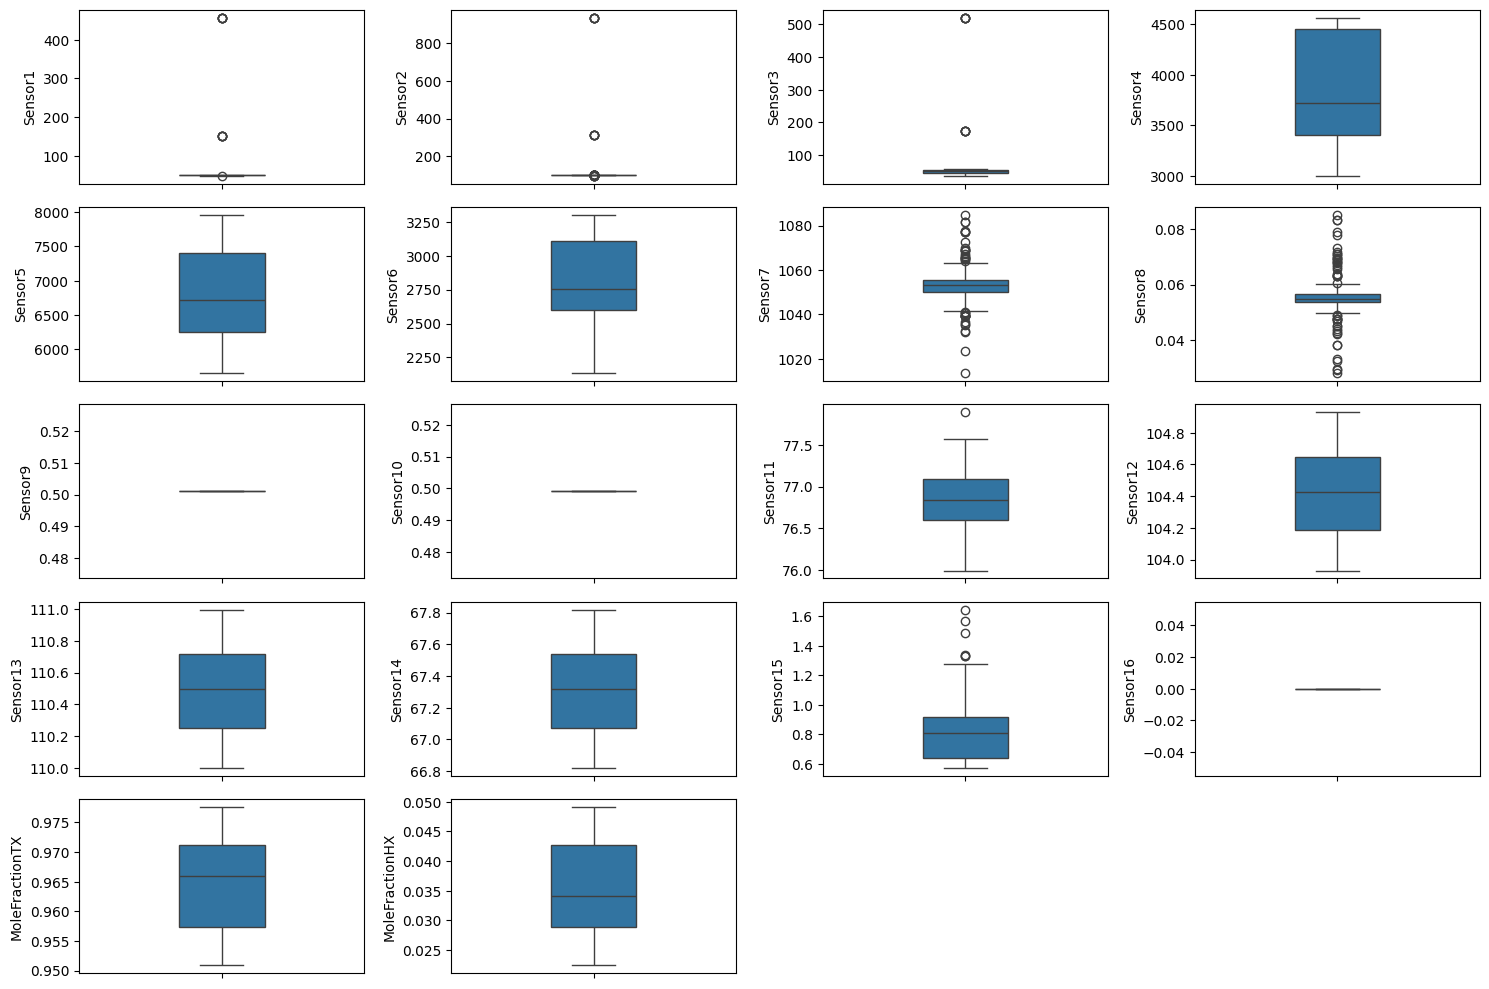

In [58]:
# prompt: create box plots for all variables in multiple plots in single figure. show outliers

plt.figure(figsize=(15, 10))
for i, var in enumerate(df2.columns):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(y=df2[var], showfliers=True, width=.3)
plt.tight_layout()
plt.show()

## Data Visualization with Violine plot

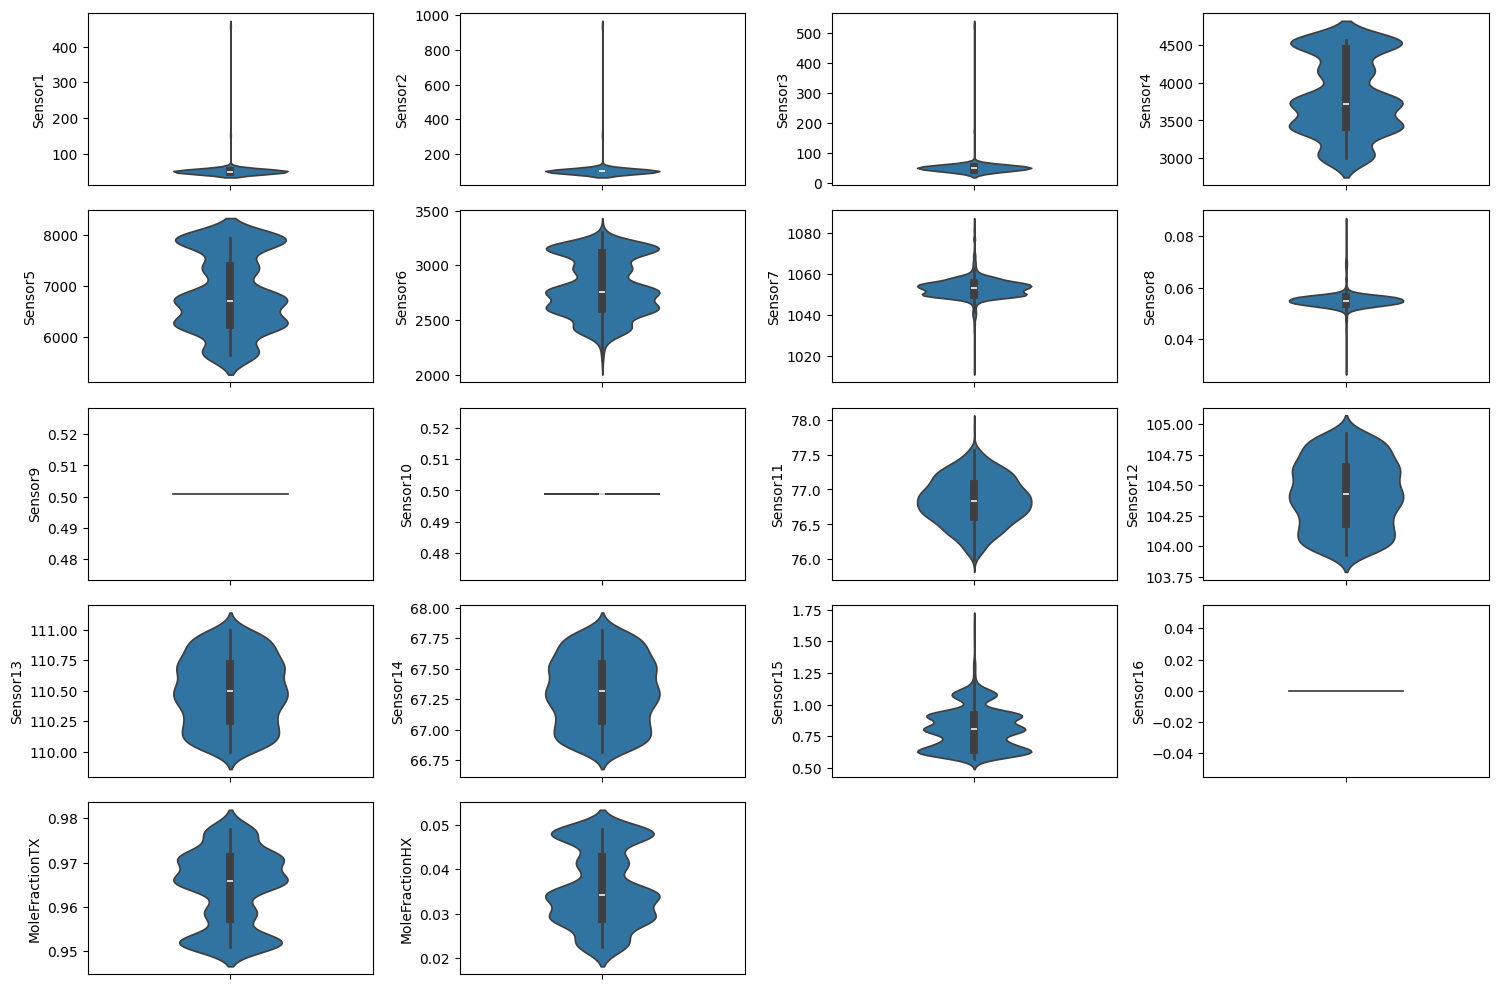

In [59]:
# prompt: do the same thing with violin plot instead of box plot


plt.figure(figsize=(15, 10))
for i, var in enumerate(df2.columns):
    plt.subplot(5, 4, i + 1)
    sns.violinplot(y=df2[var], width=.4)
plt.tight_layout()
plt.show()

## Data Visualization with Histogram plot

array([[<Axes: title={'center': 'Sensor1'}>,
        <Axes: title={'center': 'Sensor2'}>,
        <Axes: title={'center': 'Sensor3'}>,
        <Axes: title={'center': 'Sensor4'}>],
       [<Axes: title={'center': 'Sensor5'}>,
        <Axes: title={'center': 'Sensor6'}>,
        <Axes: title={'center': 'Sensor7'}>,
        <Axes: title={'center': 'Sensor8'}>],
       [<Axes: title={'center': 'Sensor9'}>,
        <Axes: title={'center': 'Sensor10'}>,
        <Axes: title={'center': 'Sensor11'}>,
        <Axes: title={'center': 'Sensor12'}>],
       [<Axes: title={'center': 'Sensor13'}>,
        <Axes: title={'center': 'Sensor14'}>,
        <Axes: title={'center': 'Sensor15'}>,
        <Axes: title={'center': 'Sensor16'}>],
       [<Axes: title={'center': 'MoleFractionTX'}>,
        <Axes: title={'center': 'MoleFractionHX'}>, <Axes: >, <Axes: >]],
      dtype=object)

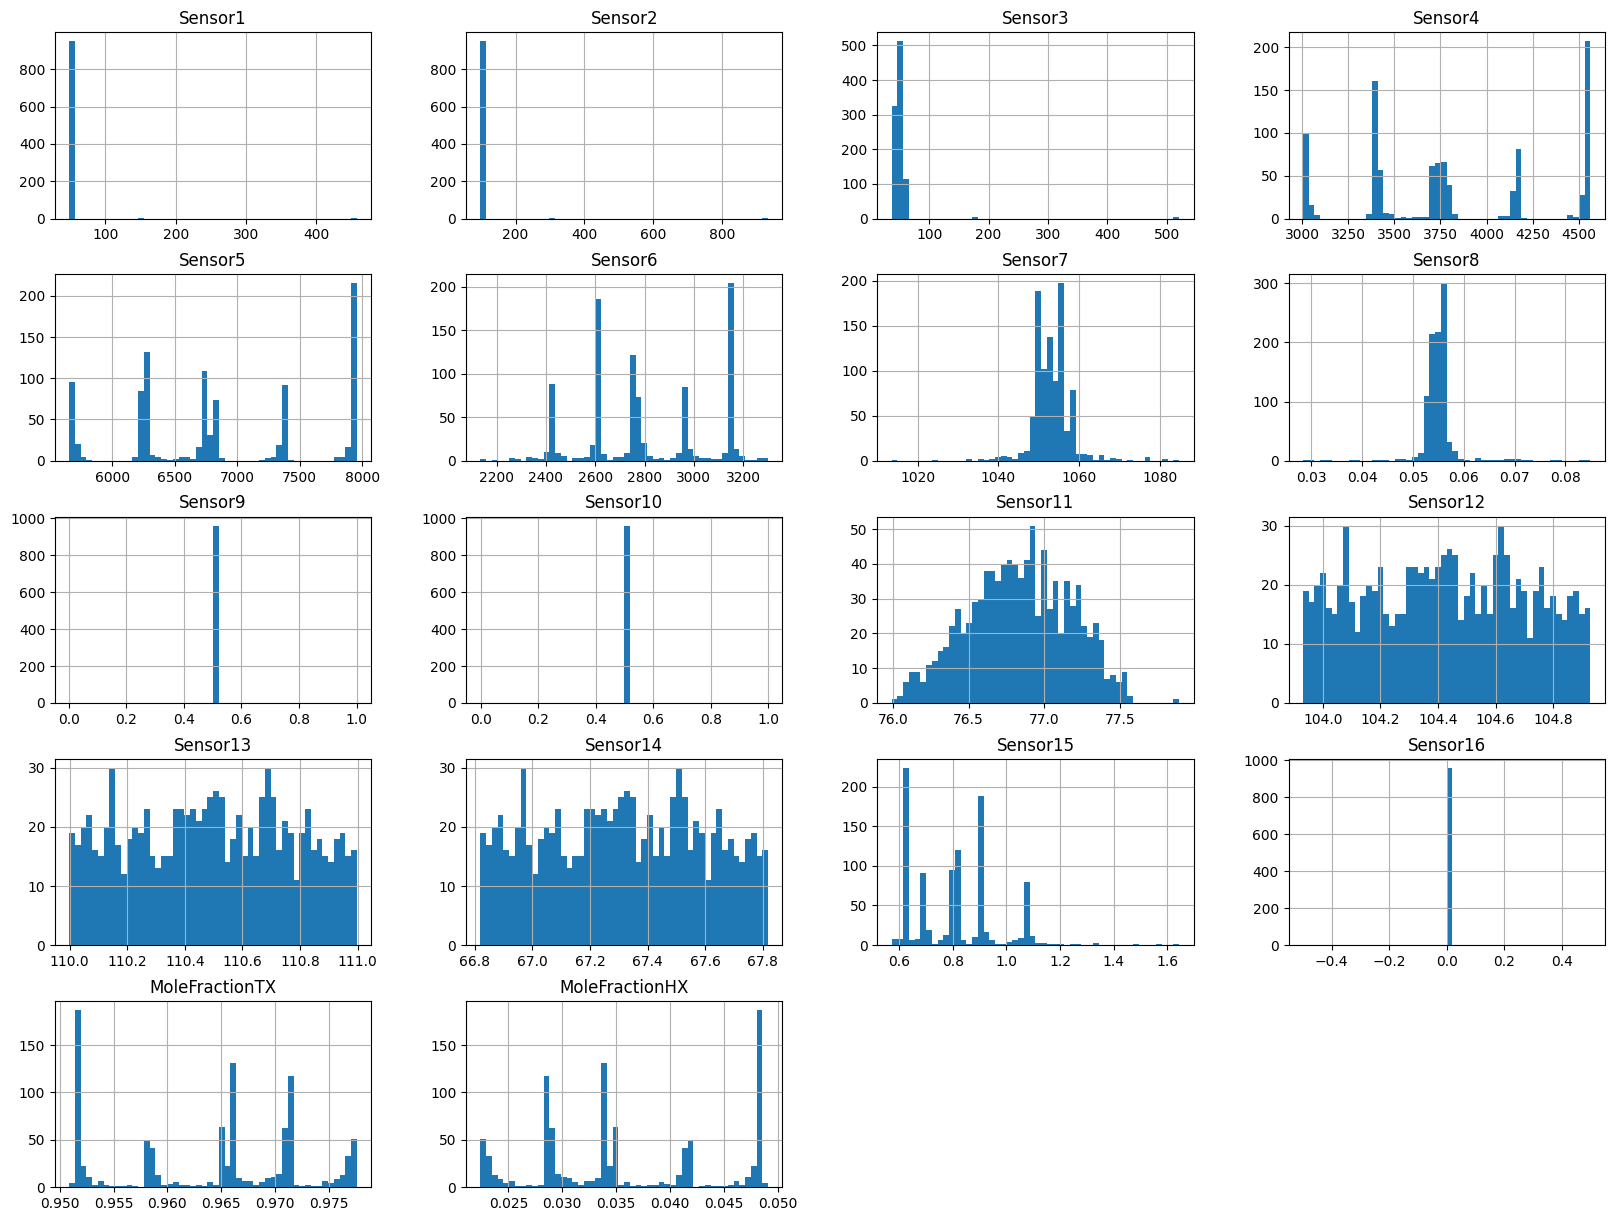

In [60]:
df2.hist(bins=50, figsize=(20,15))

## Remove columns without meaningful data

In [61]:
df2=df2.drop('Sensor16', axis=1)

# Outliers

**Strategy:** We will use statistical methods to remove outliers (IQR)

In [62]:
# prompt: remove all outliers of dfnum3 using IQR method and create a table called dfclean

# Apply IQR method to remove outliers
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1

dfclean = df2[~((df2 < (Q1 - 1.5 * IQR)) |(df2 > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Original shape:", df2.shape)
print("Shape after outlier removal:", dfclean.shape)
dfclean.head()

Original shape: (961, 17)
Shape after outlier removal: (884, 17)


,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15,MoleFractionTX,MoleFractionHX
0,49.718959,101.414959,49.718959,3693.858959,6695.368959,2924.818959,1048.588959,0.054394,0.501001,0.498999,76.803959,104.148959,110.216959,67.038059,0.798463,0.966281,0.033719
1,49.561845,100.962045,49.541545,3712.947045,6629.637045,2767.487045,1046.987045,0.054233,0.501001,0.498999,76.437645,103.977045,110.045045,66.866145,0.800811,0.965788,0.034212
2,50.189365,101.490865,50.145165,3718.008865,6692.598865,2763.018865,1050.988865,0.053941,0.501001,0.498999,77.041465,104.608865,110.676865,67.497965,0.803544,0.965758,0.034242
3,50.183496,101.403296,50.142796,3721.819296,6702.869296,2754.009296,1051.449296,0.053968,0.501001,0.498999,77.016096,104.609296,110.677296,67.498396,0.807065,0.965756,0.034244
4,50.428793,101.603693,50.406093,3724.444693,6710.444693,2744.244693,1052.674693,0.054121,0.501001,0.498999,77.252293,104.864693,110.932693,67.753793,0.811774,0.965784,0.034216


## Histogram plot with cleaned data

array([[<Axes: title={'center': 'Sensor1'}>,
        <Axes: title={'center': 'Sensor2'}>,
        <Axes: title={'center': 'Sensor3'}>,
        <Axes: title={'center': 'Sensor4'}>],
       [<Axes: title={'center': 'Sensor5'}>,
        <Axes: title={'center': 'Sensor6'}>,
        <Axes: title={'center': 'Sensor7'}>,
        <Axes: title={'center': 'Sensor8'}>],
       [<Axes: title={'center': 'Sensor9'}>,
        <Axes: title={'center': 'Sensor10'}>,
        <Axes: title={'center': 'Sensor11'}>,
        <Axes: title={'center': 'Sensor12'}>],
       [<Axes: title={'center': 'Sensor13'}>,
        <Axes: title={'center': 'Sensor14'}>,
        <Axes: title={'center': 'Sensor15'}>,
        <Axes: title={'center': 'MoleFractionTX'}>],
       [<Axes: title={'center': 'MoleFractionHX'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

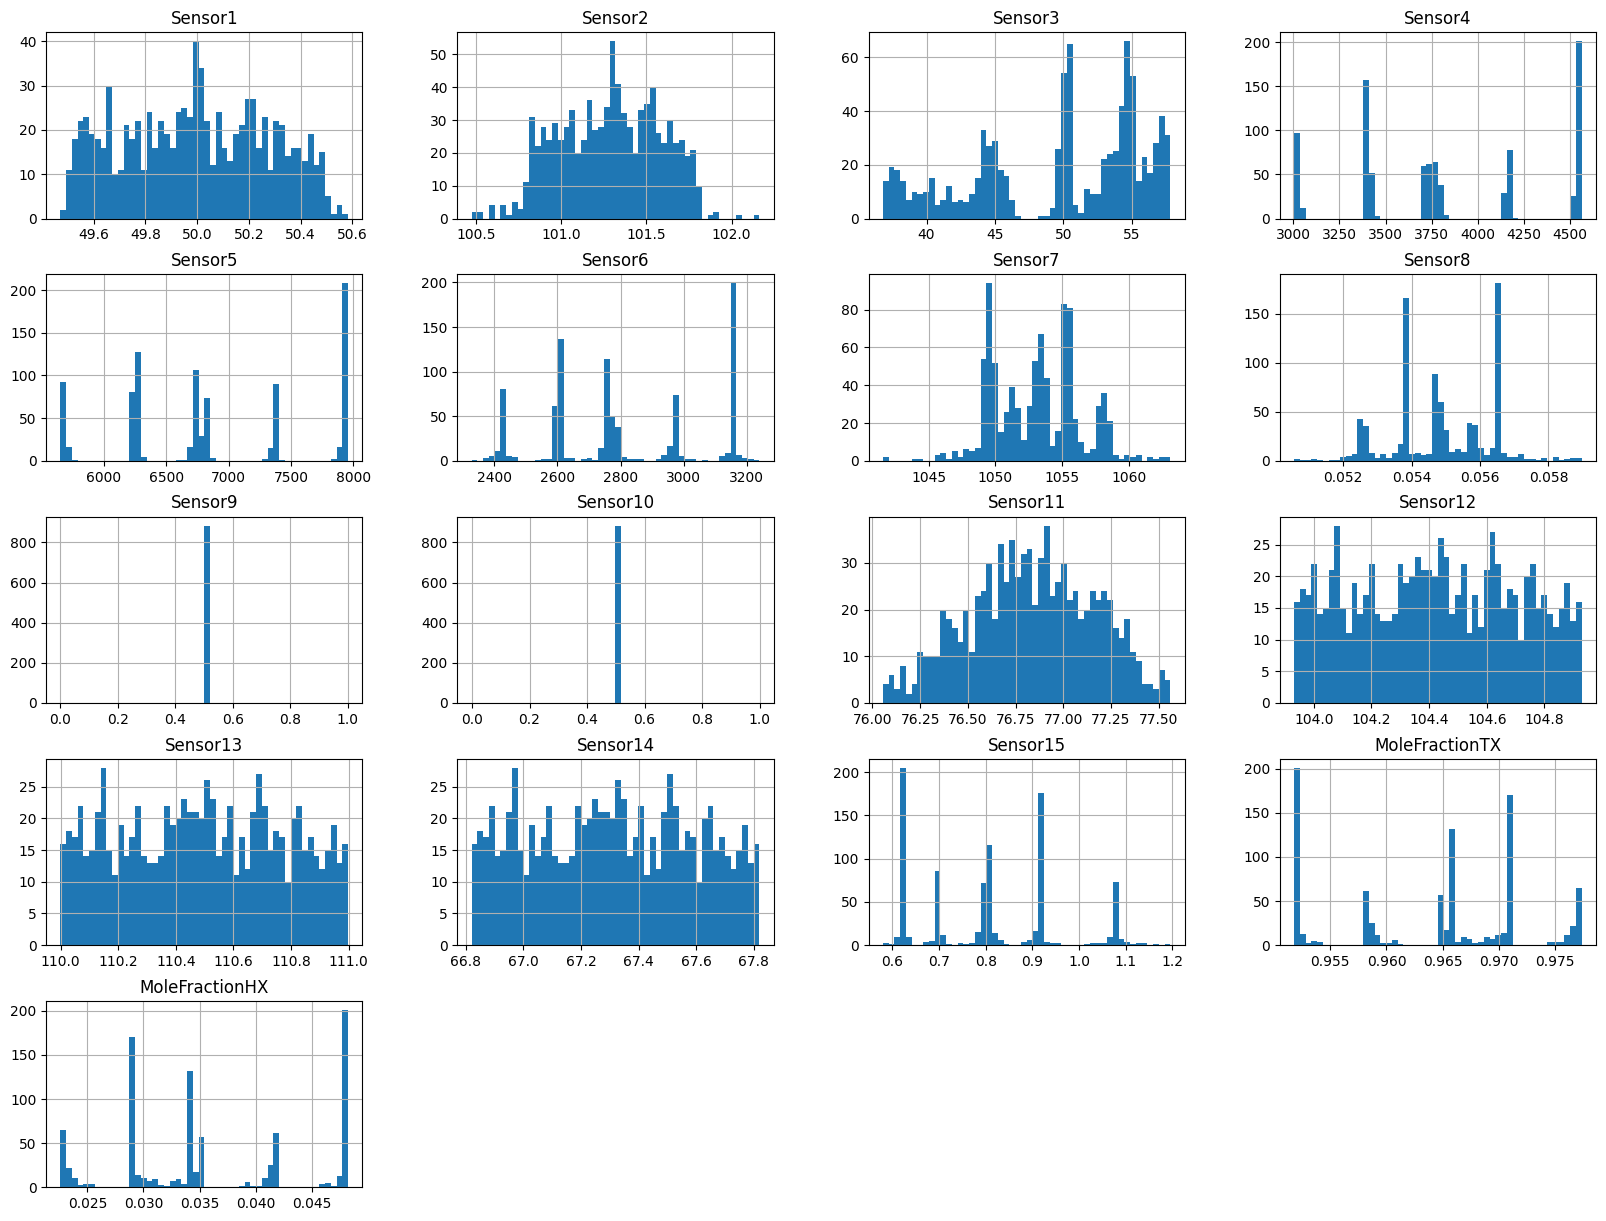

In [63]:
dfclean.hist(bins=50, figsize=(20,15))

# Corelinearity

In [64]:
# prompt: print correlations matrix and do a plot a heatmap of correlation

# calculate correlations
correlations = df2.corr()

# print correlations matrix
correlations


,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15,MoleFractionTX,MoleFractionHX
Sensor1,1.000000,0.999980,0.985540,0.028983,0.029610,0.038427,-0.023515,-0.007364,NaN,NaN,0.057101,0.046136,0.046136,0.046136,-0.029165,-0.037197,0.037197
Sensor2,0.999980,1.000000,0.985607,0.029575,0.030288,0.039336,-0.022523,-0.004560,NaN,NaN,0.054009,0.041497,0.041497,0.041498,-0.029735,-0.037258,0.037258
Sensor3,0.985540,0.985607,1.000000,0.165188,0.166012,0.170517,-0.099560,0.044219,NaN,NaN,0.127907,0.046679,0.046679,0.046679,-0.152269,-0.172363,0.172363
Sensor4,0.028983,0.029575,0.165188,1.000000,0.998642,0.959892,-0.552521,0.441386,NaN,NaN,0.479340,-0.017119,-0.017119,-0.017119,-0.916069,-0.959240,0.959240
Sensor5,0.029610,0.030288,0.166012,0.998642,1.000000,0.959797,-0.529631,0.448470,NaN,NaN,0.480445,-0.018120,-0.018120,-0.018120,-0.911593,-0.961166,0.961166
Sensor6,0.038427,0.039336,0.170517,0.959892,0.959797,1.000000,-0.662790,0.409924,NaN,NaN,0.518584,-0.020238,-0.020238,-0.020238,-0.969132,-0.941967,0.941967
Sensor7,-0.023515,-0.022523,-0.099560,-0.552521,-0.529631,-0.662790,1.000000,0.117106,NaN,NaN,-0.313934,0.049303,0.049303,0.049303,0.738440,0.590367,-0.590366
Sensor8,-0.007364,-0.004560,0.044219,0.441386,0.448470,0.409924,0.117106,1.000000,NaN,NaN,0.202800,-0.002392,-0.002392,-0.002392,-0.369369,-0.226468,0.226469
Sensor9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sensor10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


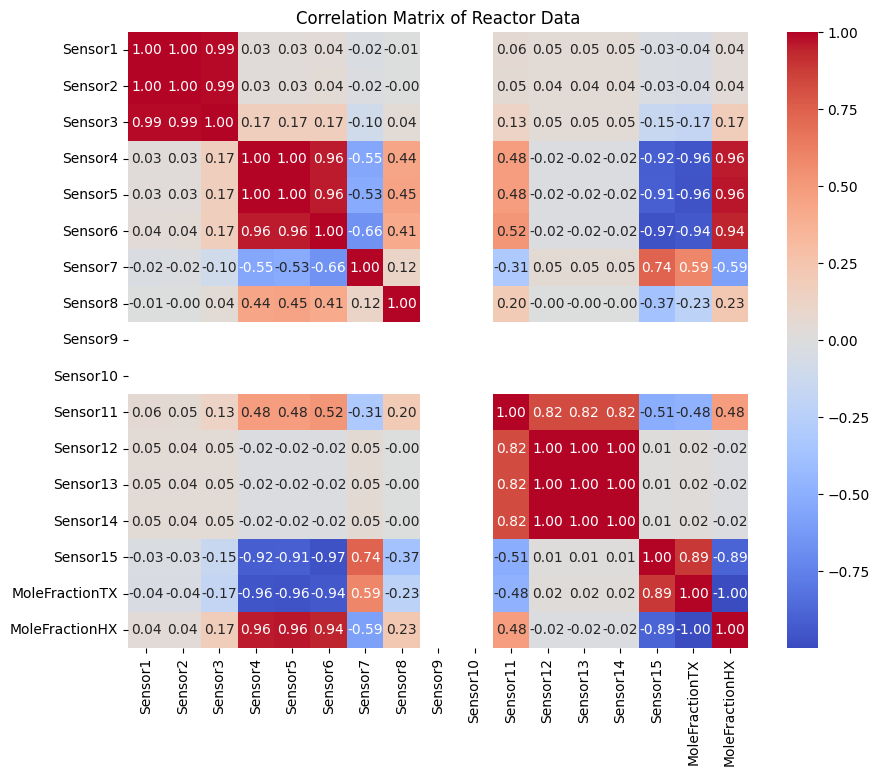

In [65]:
# plot heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Reactor Data')
plt.show()

# ML Pipeline

## X and Y

In [66]:
Y = df2['MoleFractionTX']
X = df2[[f'Sensor{i}' for i in range(1, 16)]]

## Data Normalization

In [67]:
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

## Data Split

In [68]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, Y, test_size=0.3, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (672, 15)
Shape of X_test: (289, 15)
Shape of y_train: (672,)
Shape of y_test: (289,)


In [69]:
X

,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15
0,49.718959,101.414959,49.718959,3693.858959,6695.368959,2924.818959,1048.588959,0.054394,0.501001,0.498999,76.803959,104.148959,110.216959,67.038059,0.798463
1,49.561845,100.962045,49.541545,3712.947045,6629.637045,2767.487045,1046.987045,0.054233,0.501001,0.498999,76.437645,103.977045,110.045045,66.866145,0.800811
2,50.189365,101.490865,50.145165,3718.008865,6692.598865,2763.018865,1050.988865,0.053941,0.501001,0.498999,77.041465,104.608865,110.676865,67.497965,0.803544
3,50.183496,101.403296,50.142796,3721.819296,6702.869296,2754.009296,1051.449296,0.053968,0.501001,0.498999,77.016096,104.609296,110.677296,67.498396,0.807065
4,50.428793,101.603693,50.406093,3724.444693,6710.444693,2744.244693,1052.674693,0.054121,0.501001,0.498999,77.252293,104.864693,110.932693,67.753793,0.811774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,49.604279,100.903579,54.520579,3783.434579,6808.374579,2782.764579,1052.594579,0.054906,0.501001,0.498999,76.467579,104.034579,110.102579,66.923679,0.792092
957,50.164408,101.465308,55.073908,3783.905308,6809.155308,2782.875308,1053.235308,0.054913,0.501001,0.498999,77.028608,104.595308,110.663308,67.484408,0.792288
958,50.332178,101.634378,55.234278,3784.033378,6809.343378,2783.673378,1053.403378,0.054925,0.501001,0.498999,77.196878,104.763378,110.831378,67.652478,0.792515
959,50.080385,101.384285,54.974485,3783.671285,6808.931285,2782.991285,1053.181285,0.054930,0.501001,0.498999,76.944985,104.511285,110.579285,67.400385,0.792525


# Random Forest Model

## Hyperparameter optimization

In [70]:
# prompt: create grid search to build a RF model. show the training RMSE, R2 and test RMSE, R2. Show the best model and hyper parameters

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV object
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                            param_grid=param_grid,
                            cv=5,  # 5-fold cross-validation
                            scoring='neg_mean_squared_error', # Use negative MSE to maximize
                            n_jobs=-1) # Use all available cores

# Fit the grid search to the training data
grid_search_rf.fit(X_train, y_train)

# Get the best model from the grid search
best_rf_model = grid_search_rf.best_estimator_

# Make predictions on the training set
y_train_pred_rf = best_rf_model.predict(X_train)

# Make predictions on the test set
y_test_pred_rf = best_rf_model.predict(X_test)

# Calculate RMSE and R2 for the training set
train_rmse_rf = math.sqrt(mean_squared_error(y_train, y_train_pred_rf))
train_r2_rf = r2_score(y_train, y_train_pred_rf)

# Calculate RMSE and R2 for the test set
test_rmse_rf = math.sqrt(mean_squared_error(y_test, y_test_pred_rf))
test_r2_rf = r2_score(y_test, y_test_pred_rf)

print("Random Forest Model Evaluation:")
print(f"Training RMSE: {train_rmse_rf:.4f}")
print(f"Training R2: {train_r2_rf:.4f}")
print(f"Test RMSE: {test_rmse_rf:.4f}")
print(f"Test R2: {test_r2_rf:.4f}")
print("\nBest Random Forest Model Hyperparameters:")
grid_search_rf.best_params_

Random Forest Model Evaluation:
Training RMSE: 0.0003
Training R2: 0.9985
Test RMSE: 0.0010
Test R2: 0.9868

Best Random Forest Model Hyperparameters:


{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [71]:
best_rf_model

RandomForestRegressor(n_estimators=300, random_state=42)

## Final Model

Final RF Model Evaluation:
Training RMSE: 0.0003
Training R2: 0.9985
Test RMSE: 0.0010
Test R2: 0.9868


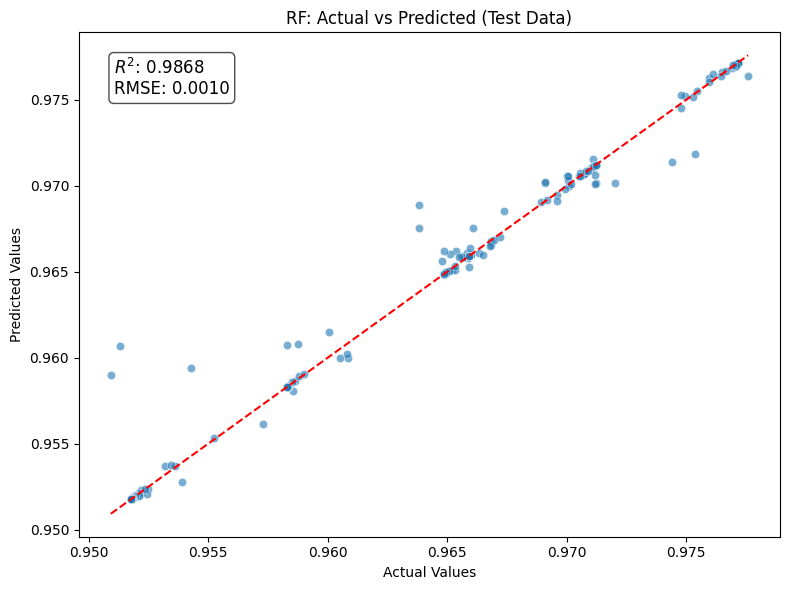

In [72]:
# Initialize the final model with the best parameters
final_model = best_rf_model

# Fit the model on training data
final_model.fit(X_train, y_train)

# Predict on train and test sets
y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

# Calculate metrics
train_rmse = math.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

test_rmse = math.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print("Final RF Model Evaluation:")
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Training R2: {train_r2:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test R2: {test_r2:.4f}")

# Scatter plot of predicted vs actual for test data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("RF: Actual vs Predicted (Test Data)")

# Annotate R2 and RMSE on the plot
plt.text(
    0.05, 0.95,
    f"$R^2$: {test_r2:.4f}\nRMSE: {test_rmse:.4f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7)
)

plt.tight_layout()
plt.show()


## Residual plot

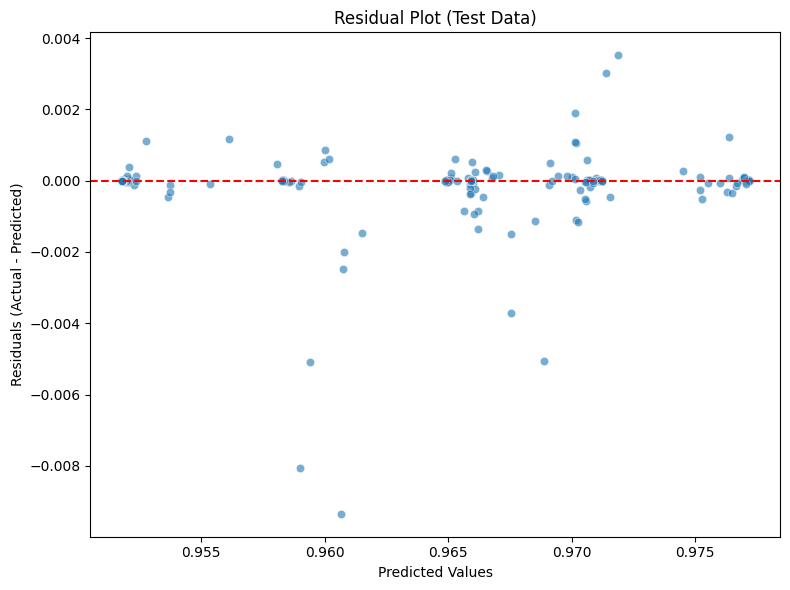

In [73]:
# Residuals for test data
residuals = y_test - y_test_pred

# Residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot (Test Data)")
plt.tight_layout()
plt.show()

## Feature importance

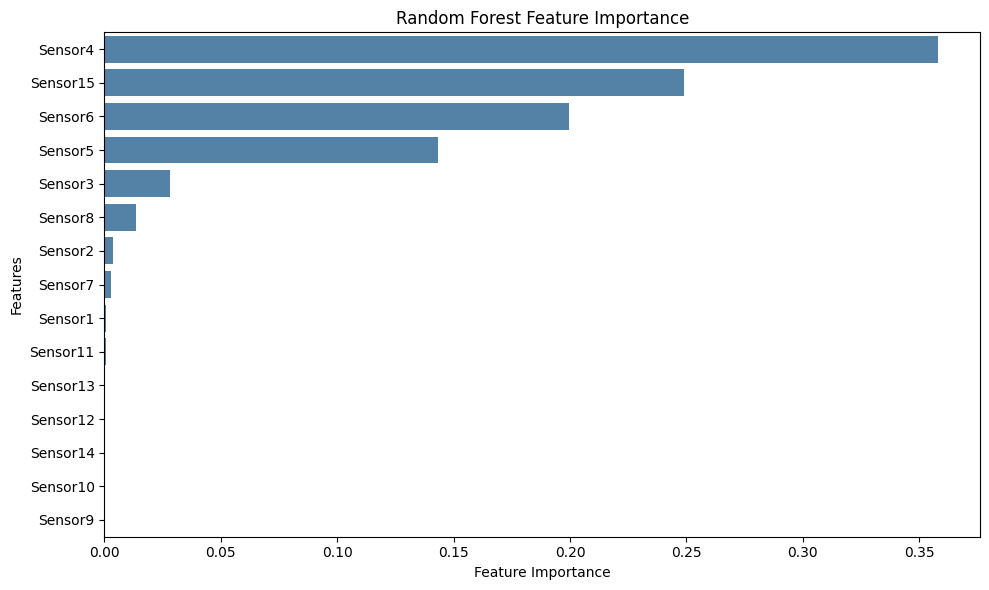

In [74]:
feature_importances = pd.Series(final_model.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, color="steelblue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()
